In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
import numpy as np
import sys
sys.path.append("src")

from data_preprocessing import load_data

In [2]:
data = load_data("data")

In [3]:
data["A1"]["0.0002"]

,col.0:ID,col.1:m1ZAMS/Msun,col.2:m2ZAMS/Msun,col.3:m1rem/Msun,col.4:m2rem/Msun,col.5:m1rem+m2rem/Msun,col.6:delay_time/Myr,col.7:sma/Rsun,col.8:ecc,col.9:kick/kms,...,col.12:cmu2,col.13:v1x/kms,col.14:v1y/kms,col.15:v1z/kms,col.16:v2x/kms,col.17:v2y/kms,col.18:v2z/kms,col.19:time_SN1/Myr,col.20:time_SN2/Myr,col.21:CE
0,0_26,52.8986,41.9354,21.2200,28.8794,50.0994,16.6680,6.5975,0.009980,0.0000,...,1.0000,0.7088,0.000759,0.0000,5.086,0.0000,0.000,4.846,6.777,True
1,0_82,62.9081,45.0256,25.5526,32.5889,58.1415,27.5917,8.9444,0.014471,0.0000,...,1.0000,1.1730,-0.000000,0.0000,7.080,0.0000,-0.000,4.455,6.406,True
2,0_160,43.2589,30.2719,16.8137,21.4028,38.2165,10.2839,3.7073,0.013083,0.0000,...,1.0000,1.1240,0.000340,0.0000,8.069,-0.0000,0.000,5.449,8.081,True
3,0_214,29.5991,25.4201,8.3773,5.1023,13.4796,227.4583,5.7546,0.296650,27.7814,...,0.9996,61.8300,6.633000,1.0020,148.500,12.5300,9.703,7.269,8.383,True
4,0_240,45.9534,30.8329,16.7825,23.0931,39.8756,9.9759,3.8238,0.012539,0.0000,...,1.0000,2.3840,0.000000,0.0000,7.441,0.0000,0.000,5.260,7.758,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147109,4_1999621,134.5520,129.6824,44.3265,45.2042,89.5307,1114.5250,33.7030,0.102000,0.0000,...,1.0000,8.1670,-0.000772,0.0000,36.120,0.0000,-0.000,3.544,4.650,True
147110,4_1999663,24.3973,22.0080,5.8064,13.7949,19.6013,38.5444,4.0385,0.037934,40.1337,...,1.0000,5.8000,-2.249000,-3.6250,9.957,-0.9815,1.108,8.729,11.500,True
147111,4_1999799,62.5326,49.3189,26.4360,32.8129,59.2489,135.3389,14.2680,0.015468,0.0000,...,1.0000,0.4187,0.027170,0.0000,6.141,-0.0000,-0.000,4.472,6.200,True
147112,4_1999908,34.5346,21.3237,12.1764,15.5364,27.7128,14.8339,3.4897,0.018042,11.4561,...,1.0000,4.0470,2.111000,-0.9472,9.755,0.0000,-0.000,6.398,10.300,True


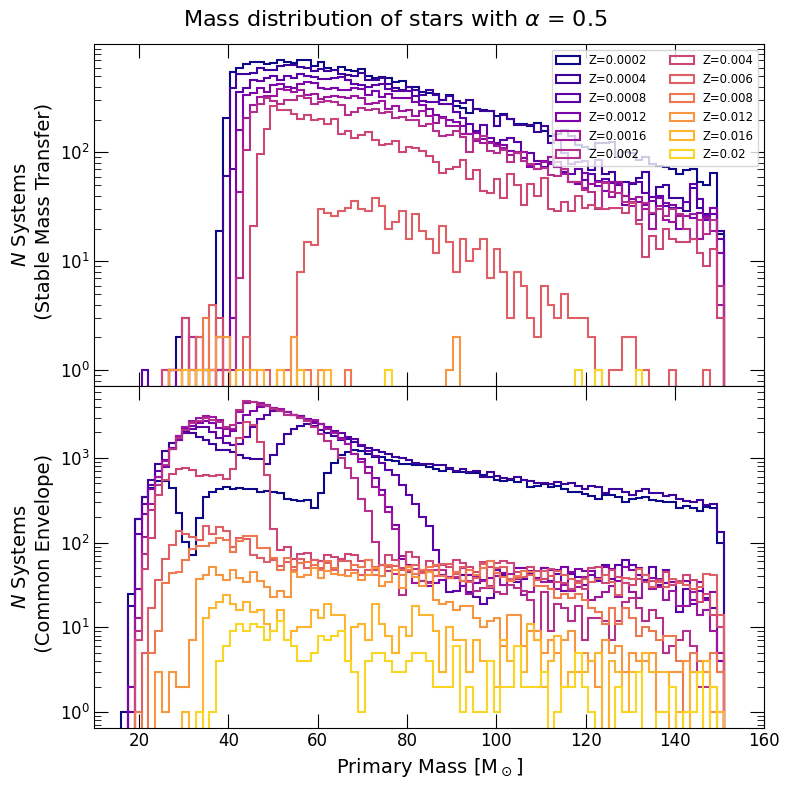

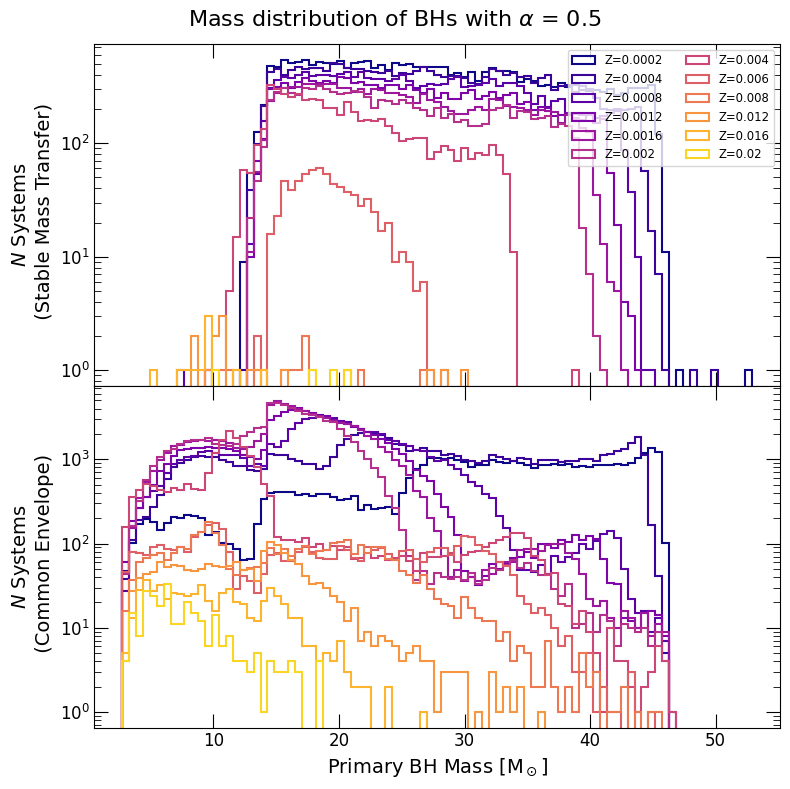

----------------------------------------------------------------------


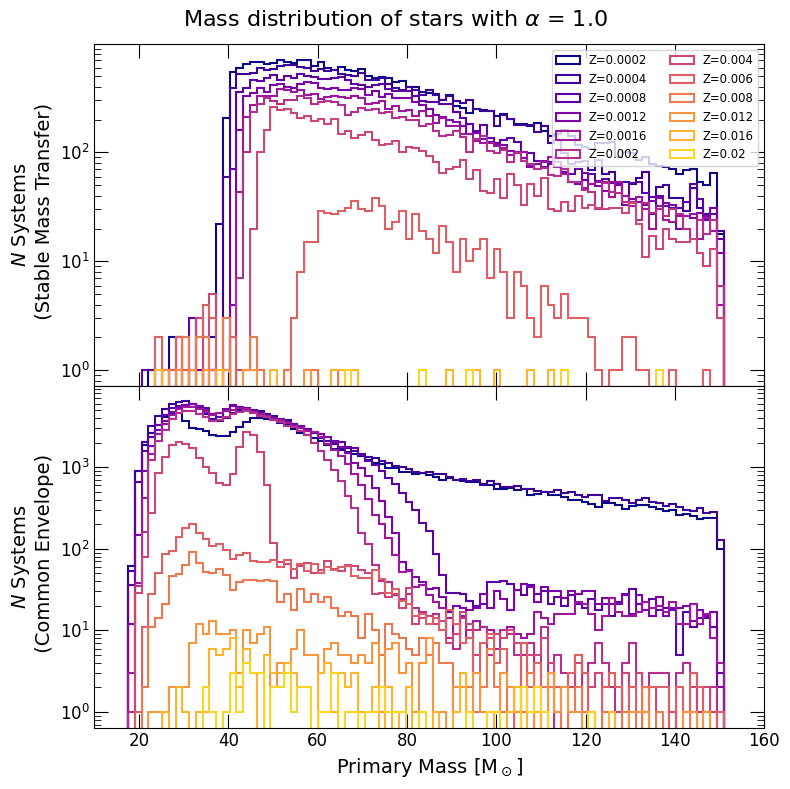

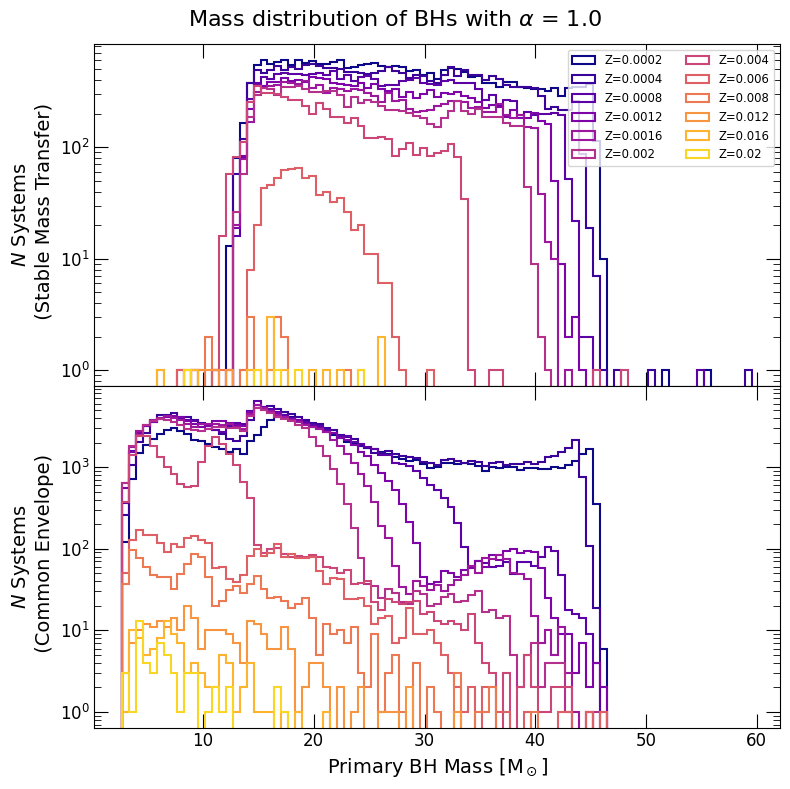

----------------------------------------------------------------------


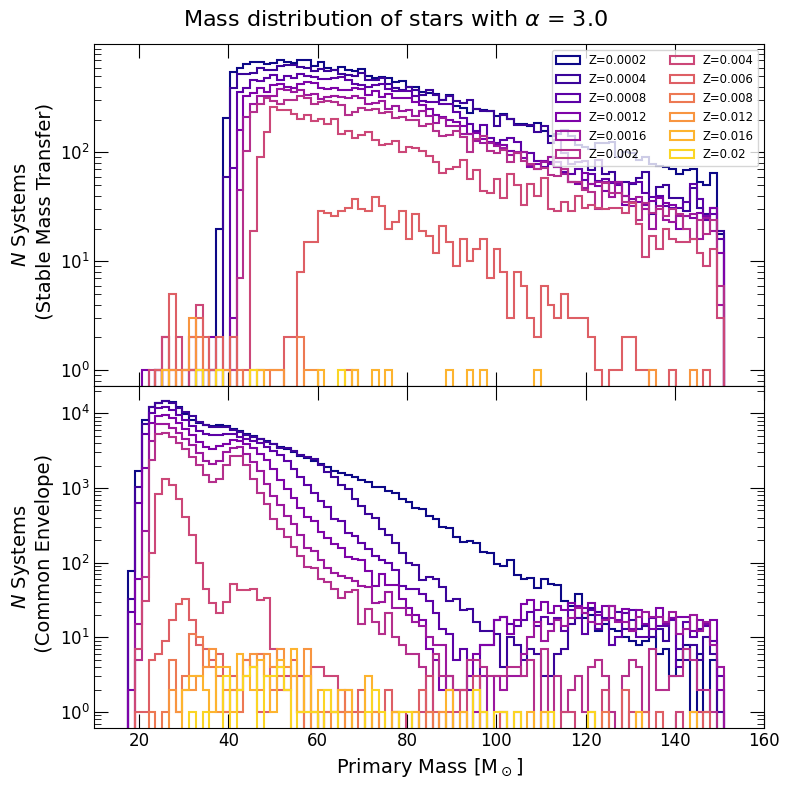

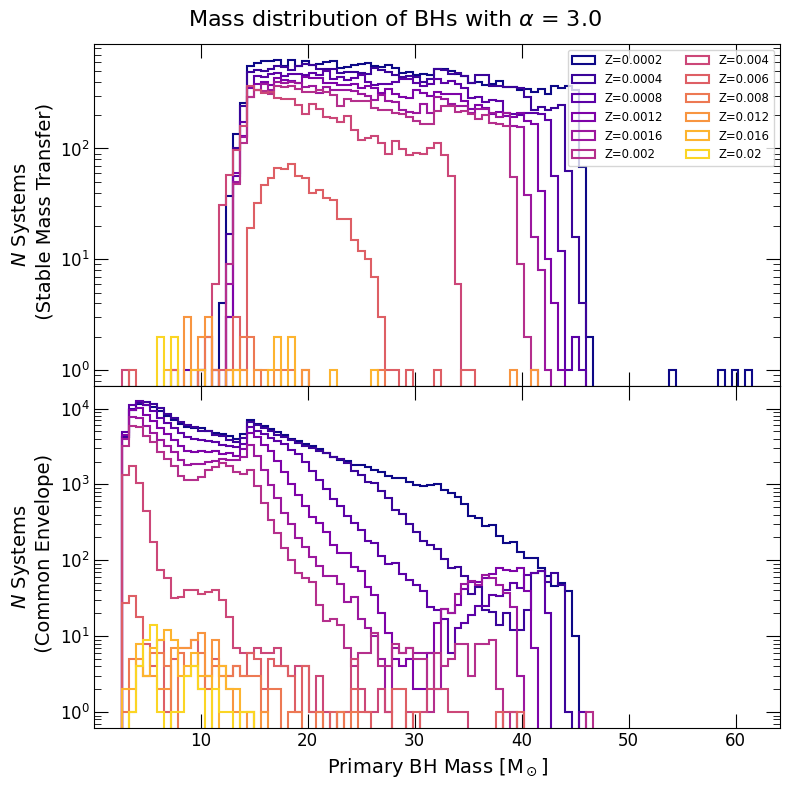

----------------------------------------------------------------------


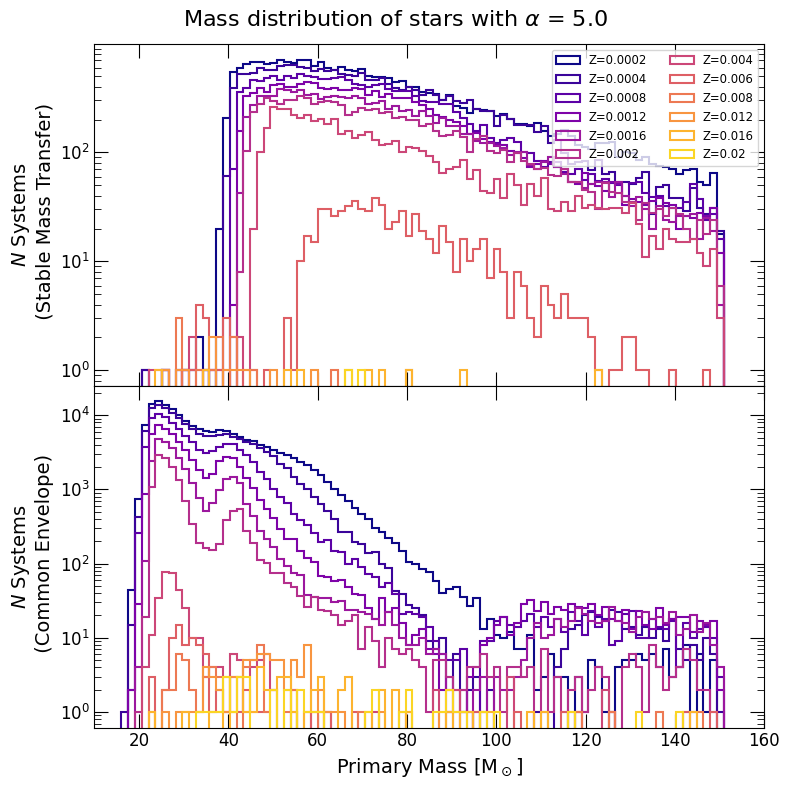

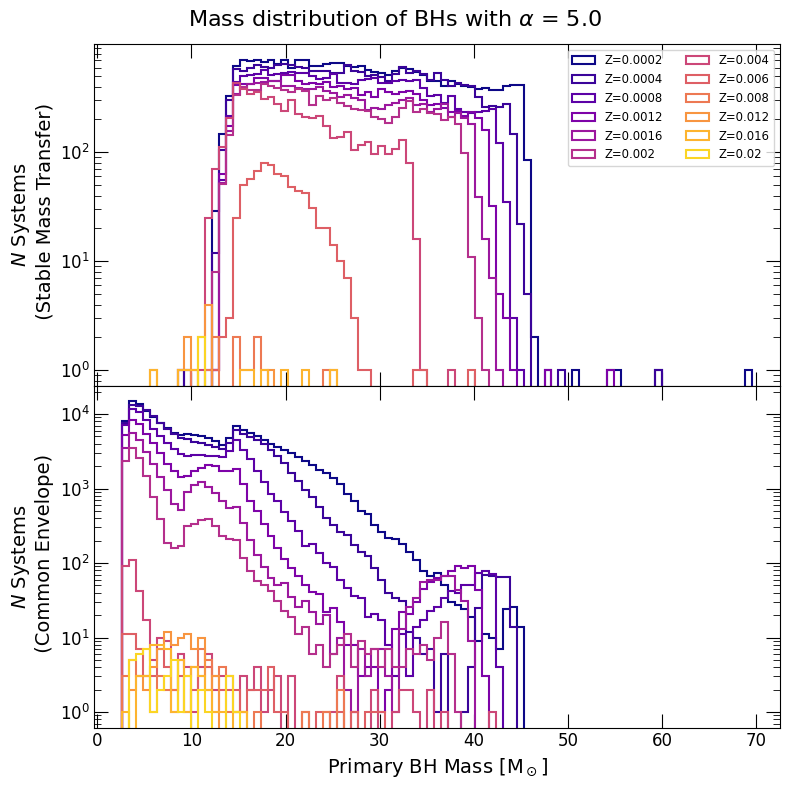

----------------------------------------------------------------------


In [4]:
def plot_histogram(list_series_1, list_series_2, list_z, xlim=None, n_bins=100, xlabel="", title=""):
    linewidth = 1.5
    major_ticks_length = 10
    minor_ticks_length = major_ticks_length / 2
    label_size = 14
    cmap = cm.plasma
    
    
    if xlim is None:
        xmin = None
        xmax = None
        for lst in [list_series_1, list_series_2]:
            new_xmin = min([min(el) for el in lst])
            new_xmax = max([max(el) for el in lst])
            if xmin is None:
                xmin = new_xmin
                xmax = new_xmax
            else:
                if new_xmin < xmin:
                    xmin = new_xmin
                if new_xmax > xmax:
                    xmax = new_xmax
        delta = abs(xmax-xmin)*0.05
        xlim = [xmin-delta, xmax+delta]
            
    bins = np.linspace(xlim[0], xlim[1], n_bins)
    
    fig = plt.figure(figsize=(8,8))
    gs  = fig.add_gridspec(nrows=2, hspace=0)
    axes = [fig.add_subplot(gs[i,0]) for i in range(2)]
    
    # plot histograms
    N = len(list_series_1)
    for i in range(N):
        color = cmap(i / N)
        axes[0].hist(list_series_1[i], bins=bins, linewidth=linewidth, edgecolor=color, histtype="step", label=f"Z={list_z[i]}")
        axes[1].hist(list_series_2[i], bins=bins, linewidth=linewidth, edgecolor=color, histtype="step", label=f"Z={list_z[i]}")
    
    # axes settings
    for ax in axes:
        ax.set_xlim(*xlim)
        ax.set_yscale("log")
        ax.tick_params(which="major", length=major_ticks_length, labelsize=label_size-2)
        ax.tick_params(which="minor", length=minor_ticks_length)

    axes[0].legend(ncol=2, fontsize="small", loc="upper right")
    axes[0].tick_params(axis='both', which='both', direction="in", top=True, right=True, labelbottom=False)
    axes[1].tick_params(axis='both', which='both', direction="in", top=True, right=True, labelbottom=True)

    axes[0].set_ylabel("$N$ Systems\n (Stable Mass Transfer)", fontsize=label_size)
    axes[1].set_xlabel(xlabel, fontsize=label_size)
    axes[1].set_ylabel("$N$ Systems\n (Common Envelope)", fontsize=label_size)
    
    fig.suptitle(title, fontsize=label_size+2)
    plt.tight_layout()
    plt.show()


alpha_sorted = sorted(data.keys(), key=lambda x: float(x[1:]))
for a in alpha_sorted:
    dict_df = data[a]
    alpha = float(a[1:])
    
    masses_smt = []
    masses_ce = []
    masses_BH_smt = []
    masses_BH_ce = []
    
    z_sorted = sorted(dict_df.keys(), key=lambda x: float(x))
    for i,z in enumerate(z_sorted):
        df = dict_df[z]
        
        # data selection
        df_smt = df[df["col.21:CE"]==0]
        df_ce = df[df["col.21:CE"]==1]
        
        # mass data
        masses_smt.append(df_smt["col.1:m1ZAMS/Msun"])
        masses_ce.append(df_ce["col.1:m1ZAMS/Msun"])
        
        # mass BH data
        masses_BH_smt.append(df_smt["col.3:m1rem/Msun"])
        masses_BH_ce.append(df_ce["col.3:m1rem/Msun"])
    
    plot_histogram(masses_smt, masses_ce, z_sorted, xlim=(10,160), xlabel="Primary Mass [M$_\odot$]", title=f"Mass distribution of stars with $\\alpha$ = {alpha}")
    plot_histogram(masses_BH_smt, masses_BH_ce, z_sorted, xlabel="Primary BH Mass [M$_\odot$]", title=f"Mass distribution of BHs with $\\alpha$ = {alpha}")
    #break
    print("-"*70)

In [ ]:
# OLD
'''
cmap = cm.plasma
linewidth = 1.5
label_size = 14
bins = np.linspace(15, 160, 100)

alpha_sorted = sorted(data.keys(), key=lambda x: float(x[1:]))
for a in alpha_sorted:
    dict_df = data[a]
    alpha = float(a[1:])
    print(f"alpha: {alpha}")
    
    fig = plt.figure(figsize=(8,8))
    gs  = fig.add_gridspec(nrows=2, hspace=0)
    axes = [fig.add_subplot(gs[i,0]) for i in range(2)]
    
    z_sorted = sorted(dict_df.keys(), key=lambda x: float(x))
    for i,z in enumerate(z_sorted):
        df = dict_df[z]
        color = cmap(i / len(dict_df))
        
        # data selection
        df_smt = df[df["col.21:CE"]==0]
        df_ce = df[df["col.21:CE"]==1]
        
        # mass data
        m_smt = df_smt["col.1:m1ZAMS/Msun"]
        m_ce = df_ce["col.1:m1ZAMS/Msun"]
        
        # plot histograms
        axes[0].hist(m_smt, bins=bins, linewidth=linewidth, edgecolor=color, histtype="step", label=f"Z={z}")
        axes[1].hist(m_ce, bins=bins, linewidth=linewidth, edgecolor=color, histtype="step", label=f"Z={z}")
        
        # axes settings
        for ax in axes:
            ax.set_yscale("log")
            ax.tick_params(which="major", length=10, labelsize=label_size-2)
            ax.tick_params(which="minor", length=5)
        
        axes[0].legend(ncol=2, fontsize="small", loc="upper right")
        axes[0].tick_params(axis='both', which='both', direction="in", top=True, right=True, labelbottom=False)
        axes[1].tick_params(axis='both', which='both', direction="in", top=True, right=True, labelbottom=True)

        axes[0].set_ylabel("$N$ Systems\n (Stable Mass Transfer)", fontsize=label_size)
        axes[1].set_xlabel("Primary Mass [M$_\odot$]", fontsize=label_size)
        axes[1].set_ylabel("$N$ Systems\n (Common Envelope)", fontsize=label_size)
    
    fig.suptitle(f"Mass distribution for $\\alpha$ = {alpha}", fontsize=label_size+2)
    plt.tight_layout()
    plt.show()
    #break'''